In [ ]:
# /content/drive/MyDrive/Диплом/sp_sales_task

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [ ]:
# данные по магазинам
st_df = pd.read_csv(r'/content/drive/MyDrive/Диплом/sp_sales_task/st_df.csv')

# данные по иерархии товаров
pr_df = pd.read_csv(r'/content/drive/MyDrive/Диплом/sp_sales_task/pr_df.csv')

# данные по продажам
sales_df_train = pd.read_csv(r'/content/drive/MyDrive/Диплом/sp_sales_task/sales_df_train.csv')

# календарь
calendar = pd.read_csv(r'/content/drive/MyDrive/Диплом/sp_sales_task/holidays_covid_calendar.csv')

In [ ]:
# мерджим флаг активности
sales_df_train = pd.merge(sales_df_train, st_df[['st_id','st_is_active']], on='st_id', how='left')

In [ ]:
# находим цену товара
sales_df_train.loc[sales_df_train['pr_sales_type_id'] == 1, 'price'] = round(sales_df_train['pr_promo_sales_in_rub'] / sales_df_train['pr_promo_sales_in_units'], 2)
sales_df_train.loc[sales_df_train['pr_sales_type_id'] != 1, 'price'] = round(sales_df_train['pr_sales_in_rub'] / sales_df_train['pr_sales_in_units'], 2)

In [ ]:
# выбираем только рабочие магазины
sales_df_train = sales_df_train[sales_df_train['st_is_active'] == 1]

In [ ]:
print('Обычные продажи в %:', round(sales_df_train['pr_sales_type_id'].value_counts()[0]/len(sales_df_train) * 100))
print('Промо продажи в %:', round(sales_df_train['pr_sales_type_id'].value_counts()[1]/len(sales_df_train) * 100))

Обычные продажи в %: 59
Промо продажи в %: 41


In [ ]:
# выводим описательную статистику
sales_df_train[sales_df_train['pr_sales_type_id'] == 0]['pr_sales_in_rub'].describe()

count    523555.000000
mean        509.140906
std        1035.530816
min       -2068.000000
25%         115.000000
50%         245.000000
75%         531.000000
max      169379.000000
Name: pr_sales_in_rub, dtype: float64

In [ ]:
# избавляемся от возвратных позиций
sales_df_train = sales_df_train[sales_df_train['pr_sales_in_rub'] >= 0]

In [ ]:
# описательная статистика продаж без промо
sales_df_train[sales_df_train['pr_sales_type_id'] == 0]['pr_sales_in_rub'].describe()

count    523513.000000
mean        509.214388
std        1035.532595
min           0.000000
25%         115.000000
50%         245.000000
75%         531.000000
max      169379.000000
Name: pr_sales_in_rub, dtype: float64

In [ ]:
# описательная статистика продаж с промо
sales_df_train[sales_df_train['pr_sales_type_id'] == 1]['pr_sales_in_rub'].describe()

count    358695.000000
mean        725.650363
std        2128.693165
min           0.000000
25%          78.000000
50%         191.000000
75%         562.000000
max      183265.000000
Name: pr_sales_in_rub, dtype: float64

In [ ]:
# что делать с этим? узнать
sales_df_train[sales_df_train['pr_sales_in_rub'] == 0].head()

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub,st_is_active,price
30,f7e6c85504ce6e82442c770f7c8606f0,3474f0e025c7deb7e127a35763bc5512,2023-06-06,1,8.0,8.0,0.0,0.0,1,0.0
1221,f7e6c85504ce6e82442c770f7c8606f0,67dcedaa1090d67cef7afe3fb36945b0,2022-12-19,1,0.0,0.0,0.0,0.0,1,NaN
3845,fa7cdfad1a5aaf8370ebeda47a1ff1c3,5b146d93f822459260216df28e572eca,2023-04-04,1,0.0,0.0,0.0,0.0,1,NaN
6313,53e19f3dbb211f20b20b45668303c1b6,ee21c04f96ab30a8b3ca761e57e016ca,2022-11-09,1,1.0,1.0,0.0,0.0,1,0.0
6454,f7e6c85504ce6e82442c770f7c8606f0,d4e879aca51d48e0feba3112f0d1b8cd,2023-02-28,1,0.0,0.0,0.0,0.0,1,NaN


In [ ]:
print(round(len(sales_df_train[(sales_df_train['pr_sales_in_units'] == 0)&
                               (sales_df_train['pr_promo_sales_in_units'] == 0)|
                               (sales_df_train['pr_sales_in_rub'] == 0) &
                               (sales_df_train['pr_promo_sales_in_rub'] == 0)])/
                               len(sales_df_train) * 100, 2), '% значений, где не указаны объемы, но есть денежные суммы и наоборот.')

7.63 % значений, где не указаны объемы, но есть денежные суммы и наоборот.


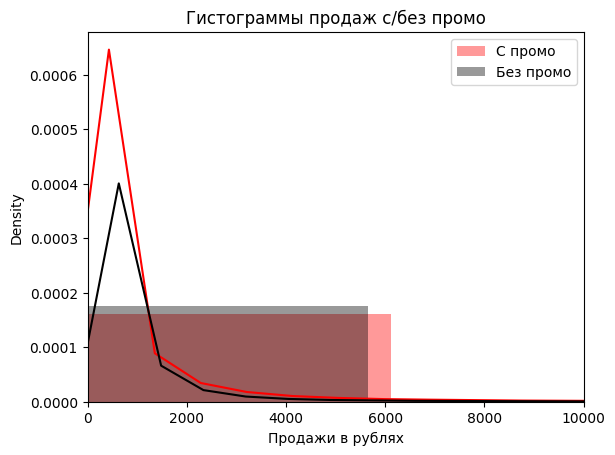

In [ ]:
# гистограммы
sns.distplot(sales_df_train[sales_df_train['pr_sales_type_id'] == 1]['pr_sales_in_rub'], label='С промо', color='red', bins=30)
sns.distplot(sales_df_train[sales_df_train['pr_sales_type_id'] == 0]['pr_sales_in_rub'], label='Без промо', color='black', bins=30)



plt.xlabel('Продажи в рублях')
plt.title('Гистограммы продаж с/без промо')
plt.xlim(0, 10000)
plt.legend()

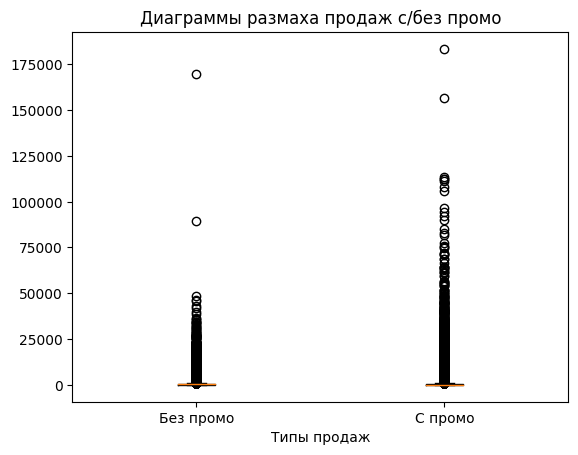

In [ ]:
# диаграммы размаха
fig, ax = plt.subplots()

ax.boxplot(sales_df_train[sales_df_train['pr_sales_type_id'] == 0]['pr_sales_in_rub'],
           positions=[1], labels=['Без промо'])

ax.boxplot(sales_df_train[sales_df_train['pr_sales_type_id'] == 1]['pr_sales_in_rub'],
           positions=[2], labels=['С промо'])

ax.set_xlabel('Типы продаж')

ax.set_title('Диаграммы размаха продаж с/без промо')

plt.show()

In [ ]:
# небольшие махинации для дальнейшего метода merge
sales_df_train.drop(columns='st_is_active', inplace=True)
calendar['calday'] = calendar['calday'].astype(str)
sales_df_train['date'] = pd.to_datetime(sales_df_train['date']).dt.strftime('%Y%m%d')

In [ ]:
sales_df_train = pd.merge(sales_df_train, calendar, left_on='date', right_on='calday', how='left')

In [ ]:
# приводим в приличный вид
sales_df_train.drop(columns='date_y', inplace=True)
sales_df_train.rename(columns={'date_x':'date'}, inplace=True)

In [ ]:
# группируем данные по праздникам
holiday_comparison = sales_df_train.groupby('holiday').agg({'pr_sales_in_units':'sum', 'pr_sales_in_rub':'sum'}).reset_index()

In [ ]:
print('На праздники приходится около {0:.2%} продаж (в шт.)'.format(holiday_comparison['pr_sales_in_units'][1] / holiday_comparison['pr_sales_in_units'].sum()))

На праздники приходится около 38.36% продаж (в шт.)


- [ ] Продажи по месячно каждого вида товара.
- [ ] Продажи по магазинам по месячно.
- [ ] Продажи по группам по месяцам.
- [ ] Продажи товаров внутри группы.

In [ ]:
sales_df_train.head()

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub,price,year,day,weekday,calday,holiday,covid
0,c81e728d9d4c2f636f067f89cc14862c,c7b711619071c92bef604c7ad68380dd,20221020,1,5.0,5.0,825.0,825.0,165.0,2022,20,4,20221020,0,0
1,42a0e188f5033bc65bf8d78622277c4e,68f441429e73dbd33b81f95da31576e9,20230129,0,4.0,0.0,196.0,0.0,49.0,2023,29,7,20230129,1,0
2,1ecfb463472ec9115b10c292ef8bc986,22988026fe85fde60d8bf777ab6bc3b4,20230302,0,1.0,0.0,78.0,0.0,78.0,2023,2,4,20230302,0,0
3,42a0e188f5033bc65bf8d78622277c4e,8e887cf8e64ab8e7173701a979476567,20230405,1,0.0,0.0,69.0,69.0,inf,2023,5,3,20230405,0,0
4,16a5cdae362b8d27a1d8f8c7b78b4330,e6fc24ca846339d204b0b50e9f772484,20230217,0,1.0,0.0,161.0,0.0,161.0,2023,17,5,20230217,0,0


In [ ]:
sales_df_train['pr_sales_in_units'] = sales_df_train.groupby(['st_id', 'pr_sku_id'])['pr_sales_in_units'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

In [ ]:
sales_df_train.groupby(['st_id', 'pr_sku_id'])['pr_sales_in_units'].mode()[0]

AttributeError: ignored

In [ ]:
sales_df_train

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub,price,year,day,weekday,calday,holiday,covid
0,c81e728d9d4c2f636f067f89cc14862c,c7b711619071c92bef604c7ad68380dd,20221020,1,5.0,5.0,825.0,825.0,165.00,2022,20,4,20221020,0,0
1,42a0e188f5033bc65bf8d78622277c4e,68f441429e73dbd33b81f95da31576e9,20230129,0,4.0,0.0,196.0,0.0,49.00,2023,29,7,20230129,1,0
2,1ecfb463472ec9115b10c292ef8bc986,22988026fe85fde60d8bf777ab6bc3b4,20230302,0,1.0,0.0,78.0,0.0,78.00,2023,2,4,20230302,0,0
3,42a0e188f5033bc65bf8d78622277c4e,8e887cf8e64ab8e7173701a979476567,20230405,1,0.0,0.0,69.0,69.0,inf,2023,5,3,20230405,0,0
4,16a5cdae362b8d27a1d8f8c7b78b4330,e6fc24ca846339d204b0b50e9f772484,20230217,0,1.0,0.0,161.0,0.0,161.00,2023,17,5,20230217,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882203,c81e728d9d4c2f636f067f89cc14862c,a0150fefa71d6606d5e642fa0e7b8ad8,20221213,1,1.0,1.0,33.0,33.0,33.00,2022,13,2,20221213,0,0
882204,42a0e188f5033bc65bf8d78622277c4e,5b146d93f822459260216df28e572eca,20230418,0,1.0,0.0,192.0,0.0,192.00,2023,18,2,20230418,0,0
882205,42a0e188f5033bc65bf8d78622277c4e,c8bd18ea08d2f47cb0a7992f11ada9de,20220816,0,5.0,0.0,970.0,0.0,194.00,2022,16,2,20220816,0,0
882206,f7e6c85504ce6e82442c770f7c8606f0,b960c6ee5b5efa12e73f810204b561a8,20230423,0,4.0,0.0,262.0,0.0,65.50,2023,23,7,20230423,1,0


In [ ]:
st_df.head()

,st_id,st_city_id,st_division_code,st_type_format_id,st_type_loc_id,st_type_size_id,st_is_active
0,1aa057313c28fa4a40c5bc084b11d276,1587965fb4d4b5afe8428a4a024feb0d,81b4dd343f5880df806d4c5d4a846c64,4,3,19,0
1,bd470ca955d9497bbcb808e59952fffc,955d864a62659945cc9434898e275deb,e26072c92d8fe0738df44d571d5f5e8b,4,3,19,1
2,6364d3f0f495b6ab9dcf8d3b5c6e0b01,b8b4b727d6f5d1b61fff7be687f7970f,da742b3cfca5388aaf9af28a726a3c30,1,1,12,1
3,1ecfb463472ec9115b10c292ef8bc986,908c9a564a86426585b29f5335b619bc,429a86ff6336c144ddaf6144f52ab52c,2,1,28,1
4,16a5cdae362b8d27a1d8f8c7b78b4330,c1f75cc0f7fe269dd0fd9bd5e24f9586,296bd0cc6e735f9d7488ebc8fbc19130,1,2,8,1
